In [1]:
!pip install pandas seaborn matplotlib numpy --quiet

In [2]:
import pandas as pd
import numpy as np

In [97]:
df = pd.read_csv('/Users/ltsai/Documents/workspace/github/datascience-examples/creditcard.csv')

In [112]:
features = df.columns.values

# Finding features with the highest correlation

In [113]:
def most_corr(param, n):
    class_corr = df.corr()[param].sort_values(ascending=False)
    list_class = []
    for i in features:
        if(np.abs(class_corr[i]) >= n): 
           list_class.append(i)
    return list_class
# Select features with correlation higher than 0.1 (positive correlation) or lower than -0.1 (negative correlation)
selected_features = most_corr('Class', 0.1)
selected_features

['V1',
 'V3',
 'V4',
 'V7',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'Class']

In [117]:
dataset = df[selected_features]
#dataset = df

# Building your first baseline Logistic Regression model

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.metrics import classification_report, recall_score, precision_score, \
    average_precision_score, plot_precision_recall_curve, \
    roc_curve, roc_auc_score, confusion_matrix, accuracy_score

In [119]:
RANDOM_SEED = 42

## Split the data into X and y

In [120]:
# # Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
# # RobustScaler is less prone to outliers.

# dataset['scaled_amount'] = RobustScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))
# #dataset['scaled_time'] = RobustScaler().fit_transform(dataset['Time'].values.reshape(-1,1))

# dataset = dataset.drop(['Amount'], axis=1)
# dataset = dataset.drop(['Time'], axis=1)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Class',1) , dataset['Class'], test_size=0.25, random_state=RANDOM_SEED)

In [122]:
X_train.shape

(213605, 11)

In [123]:
X_test.shape

(71202, 11)

In [124]:
# test_size = 0.25
round(X_test.shape[0]/df.shape[0], 2)

0.25

In [125]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to our data
baseline = LogisticRegression()
baseline.fit(X_train, y_train)

# Obtain model predictions
y_baseline = baseline.predict(X_test)

# Probabilities 
y_proba_baseline = baseline.predict_proba(X_test)[:,1]

In [126]:
print(classification_report(y_test, y_baseline))
print('\n')
print('AUC: {}%'.format(roc_auc_score(y_test, y_proba_baseline)))
print('Precision-Recall: {}'.format(average_precision_score(y_test, y_proba_baseline)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.82      0.58      0.68       113

    accuracy                           1.00     71202
   macro avg       0.91      0.79      0.84     71202
weighted avg       1.00      1.00      1.00     71202



AUC: 0.9710579670977064%
Precision-Recall: 0.7372885150703538


In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

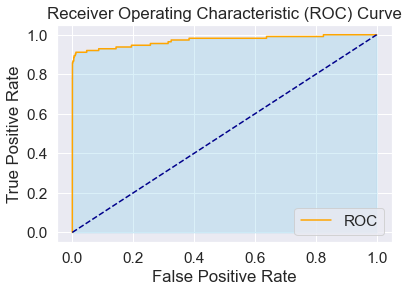

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_baseline)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Test Data Accuracy: 0.9991


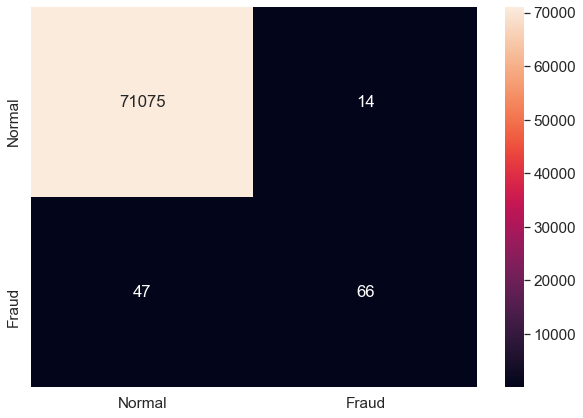

In [140]:
LABELS = ["Normal", "Fraud"]

cm = confusion_matrix(y_test, y_baseline) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_baseline))